In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
cars = pd.read_csv('Data Viz with Matplotlib & Seaborn/Data/car_prices.csv', on_bad_lines='skip')
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558835 entries, 0 to 558834
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558835 non-null  int64  
 1   make          548534 non-null  object 
 2   model         548436 non-null  object 
 3   trim          548184 non-null  object 
 4   body          545640 non-null  object 
 5   transmission  493478 non-null  object 
 6   vin           558835 non-null  object 
 7   state         558835 non-null  object 
 8   condition     547041 non-null  float64
 9   odometer      558741 non-null  float64
 10  color         558086 non-null  object 
 11  interior      558086 non-null  object 
 12  seller        558835 non-null  object 
 13  mmr           558835 non-null  int64  
 14  sellingprice  558835 non-null  int64  
 15  saledate      558835 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


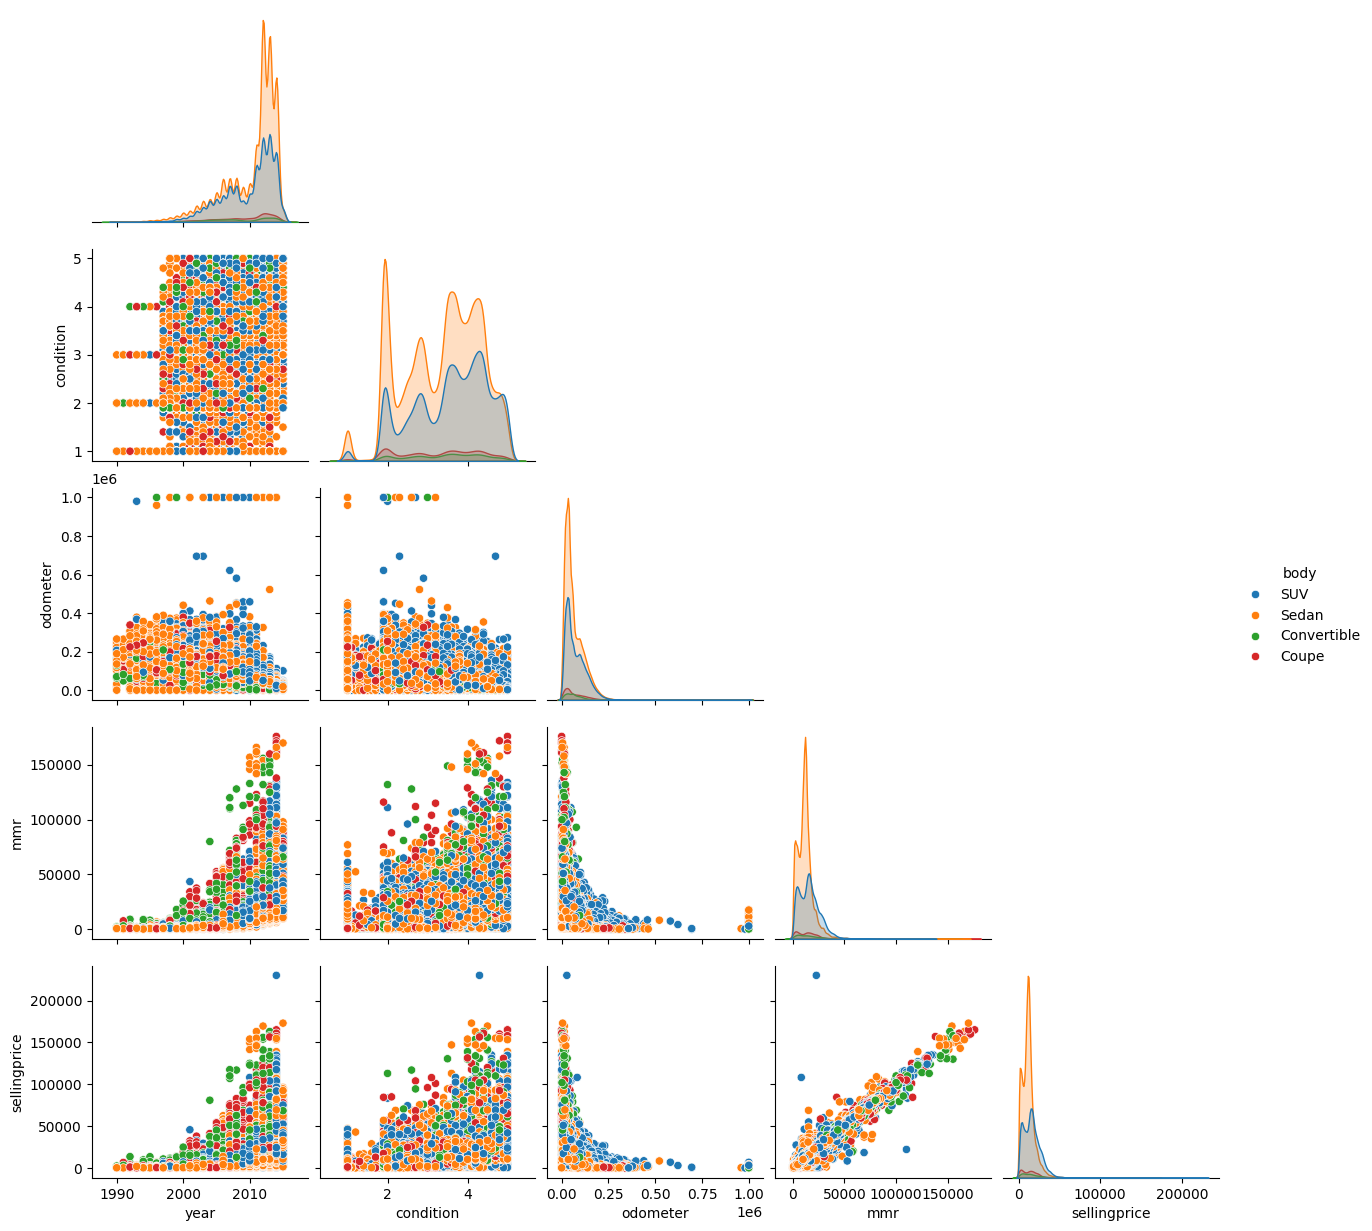

In [14]:
style_list = ['SUV', 'Sedan', 'Convertible', 'Coupe']

sns.pairplot(
    cars[cars['body'].isin(style_list)],
    corner=True,
    hue='body'
)

<Axes: >

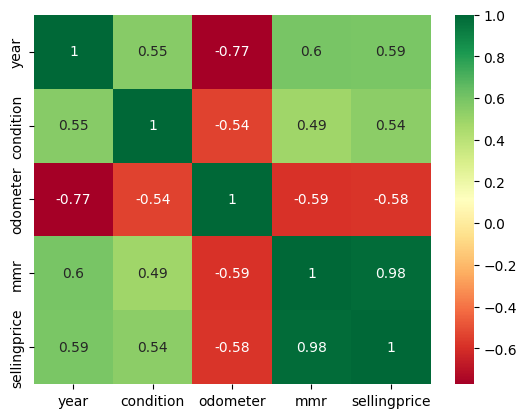

In [20]:
sns.heatmap(
	cars.corr(numeric_only=True),
	cmap='RdYlGn',
	annot=True,
)

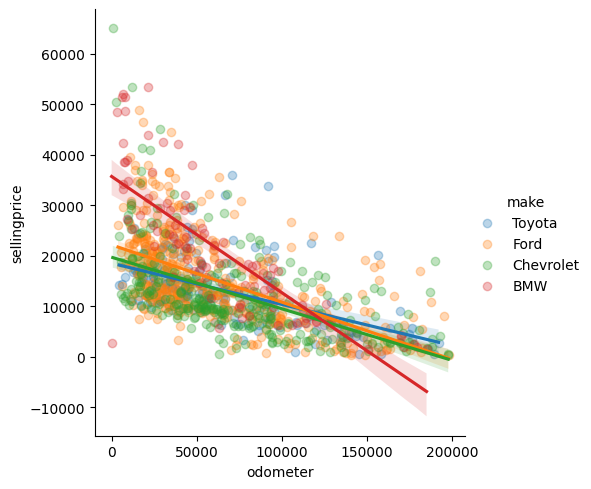

In [29]:
brand_list = ['Ford','BMW','Toyota','Chevrolet']

query01 = cars['make'].isin(brand_list)
query02 = cars['sellingprice'] < 150_000
query03 = cars['odometer'] < 200_000

sns.lmplot(
    x='odometer',
    y='sellingprice',
    data=cars[query01 & query02 & query03].sample(1000),
    hue='make',
    scatter_kws=({'alpha':.3})
)

In [30]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(
    x=cars_regress['odometer'], 
    y=cars_regress['sellingprice']
)

LinregressResult(slope=np.float64(-0.10685601328007205), intercept=np.float64(20817.48916684249), rvalue=np.float64(-0.5773608259685735), pvalue=np.float64(0.0), stderr=np.float64(0.00021987115334556415), intercept_stderr=np.float64(18.58712332844243))

In [31]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress['make'] == brand]
    print(f'{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}')

Ford: (np.float64(-0.09953734771818873), np.float64(20840.011075886512))
BMW: (np.float64(-0.2225033042967633), np.float64(35567.979744684795))
Toyota: (np.float64(-0.07594777614361674), np.float64(17813.017107685304))
Chevrolet: (np.float64(-0.08841045962774952), np.float64(18705.587357485056))


In [34]:
bins = np.linspace(1,5,num=9) # 1 até 5, 9 'cortes'
bins

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

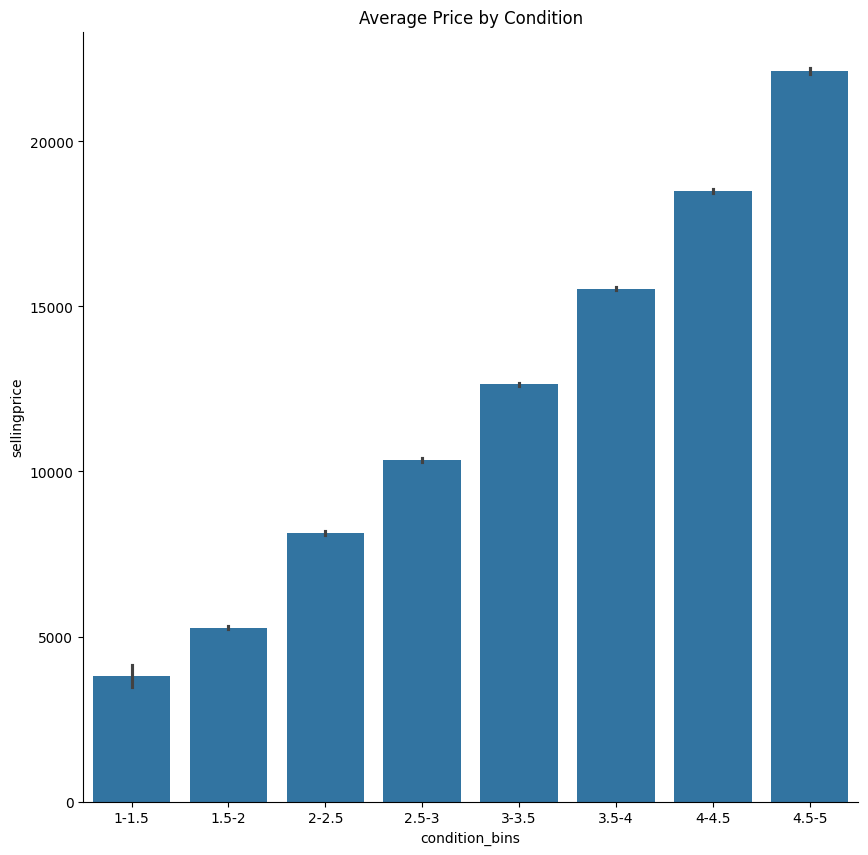

In [32]:
fig, ax = plt.subplots(figsize=(10,10))

bins = np.linspace(1,5,9)
labels = ['1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']

cars['condition_bins'] = pd.cut(cars['condition'], bins=bins, labels=labels)

sns.barplot(
    x='condition_bins',
    y='sellingprice',
    data=cars
)

ax.set_title('Average Price by Condition')

sns.despine()

In [35]:
cars['make'].value_counts().head()

make
Ford         93554
Chevrolet    60197
Nissan       53945
Toyota       39871
Dodge        30710
Name: count, dtype: int64

In [37]:
cars['condition_bins'].head()

0    4.5-5
1    4.5-5
2    4-4.5
3    4-4.5
4    4-4.5
Name: condition_bins, dtype: category
Categories (8, object): ['1-1.5' < '1.5-2' < '2-2.5' < '2.5-3' < '3-3.5' < '3.5-4' < '4-4.5' < '4.5-5']

In [38]:
top10 = cars['make'].value_counts().iloc[:10].index

avgs = cars.loc[cars['make'].isin(top10)].pivot_table(
    index='make', 
    columns='condition_bins',
    observed=False,
    values={'sellingprice':'mean'}
).droplevel(0, axis=1)

avgs.head()

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556


<Axes: title={'center': 'Avg. Selling Price by Make and Quality'}, xlabel='condition_bins', ylabel='make'>

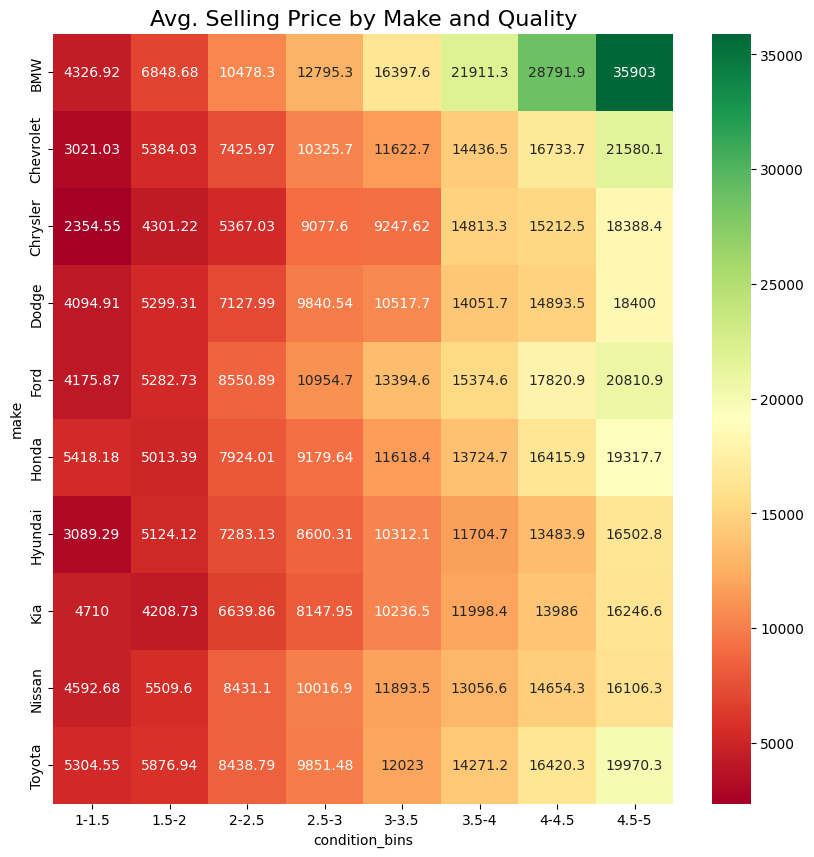

In [39]:
fig, ax = plt.subplots(figsize=(10,10))

plt.title('Avg. Selling Price by Make and Quality', fontsize=16)

sns.heatmap(
    avgs,
    annot=True,
    cmap='RdYlGn',
    fmt='g'
)

In [44]:
f150s = cars[cars['model'] == 'F-150']

<Axes: xlabel='sellingprice', ylabel='Count'>

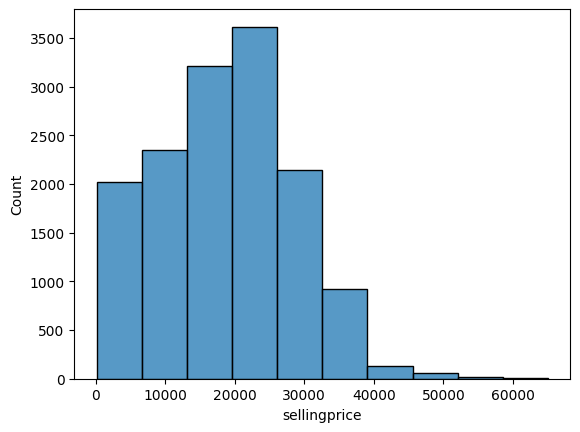

In [45]:
sns.histplot(
    x='sellingprice',
    bins=10,
    data=f150s
)

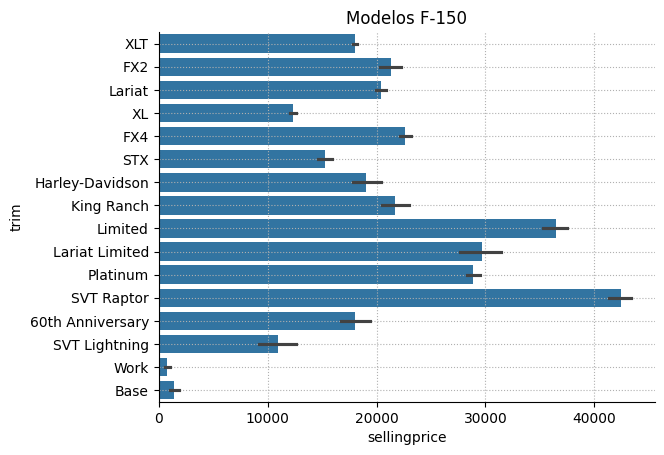

In [50]:
fig, ax = plt.subplots()

sns.barplot(
    y='trim',
    x='sellingprice',
    data=f150s
)

plt.grid(ls=':')
plt.title('Modelos F-150')
sns.despine()


In [51]:
subcategorias = ['XL','XLT','Platinum','SVT Raptor']

f150s_reduced = f150s[f150s['trim'].isin(subcategorias)]

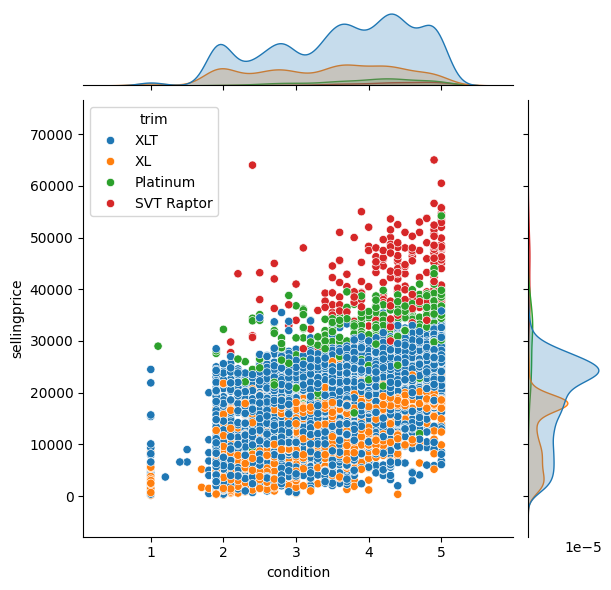

In [52]:
sns.jointplot(
    x='condition',
    y='sellingprice',
    kind='scatter',
    data=f150s_reduced,
    hue='trim'
)

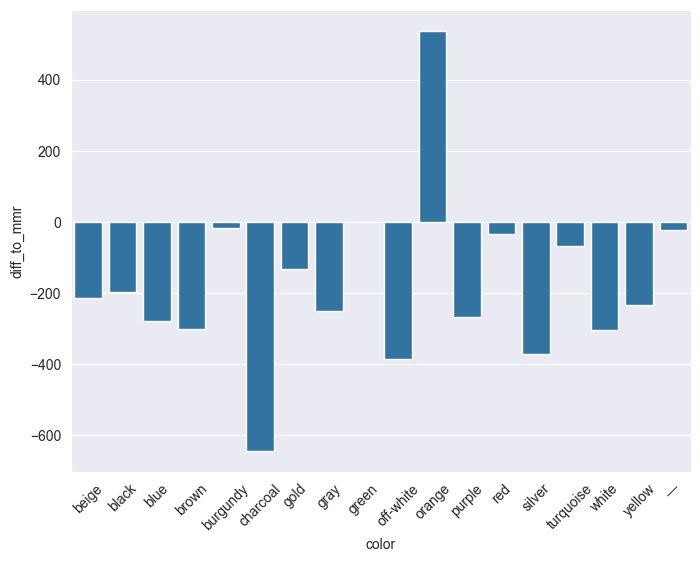

In [53]:
sns.set_style('darkgrid')

f150s = f150s.assign(diff_to_mmr = f150s['sellingprice'] - f150s['mmr'])

f150s_by_color = f150s.groupby('color', as_index=False).agg({'diff_to_mmr':'mean'})

fig, ax = plt.subplots(figsize = (8,6))

sns.barplot(
    x='color',
    y='diff_to_mmr',
    data=f150s_by_color
)

plt.xticks(rotation=45)

plt.show()

In [57]:
subcategorias = ['XL','XLT','Platinum','SVT Raptor']

query01 = f150s['trim'].isin(subcategorias)
query02 = f150s['color'] != 'orange'

f150s_reduced = f150s[query01 & query02]

f150s_pivot = f150s_reduced.loc[f150s_reduced['year'].between(2009,2014)].pivot_table(
    index='trim',
    columns='condition_bins',
    values={'sellingprice':'mean'},
    observed=False
)


<Axes: xlabel='None-condition_bins', ylabel='trim'>

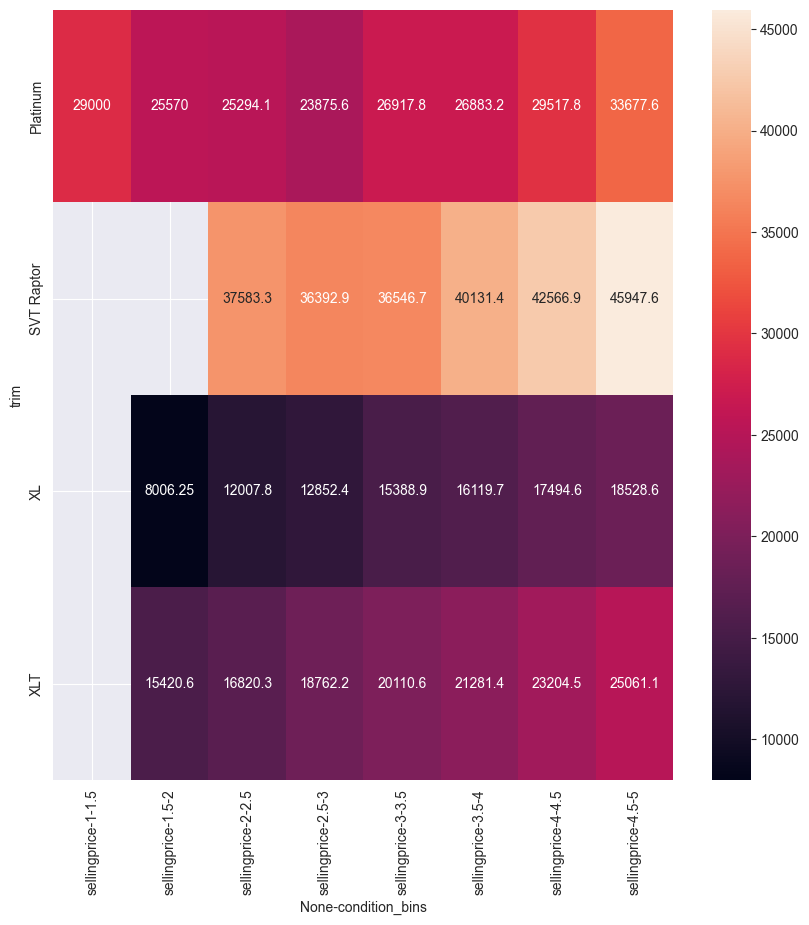

In [58]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(
    f150s_pivot,
    annot=True,
    fmt='g'
)

<Axes: xlabel='state', ylabel='auto_count'>

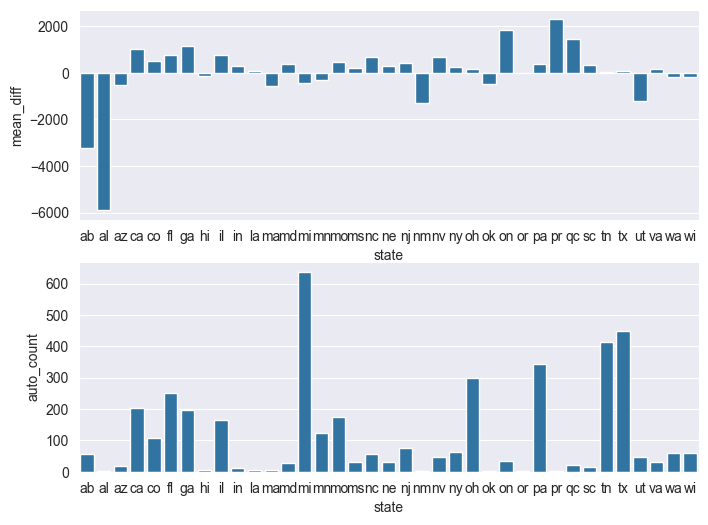

In [59]:
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),
                 auto_count=("diff_to_mmr", "count")
             )
)

fig, ax = plt.subplots(2, figsize=(8, 6))

sns.barplot(
 x="state",
 y="mean_diff",
 data = f150s_XLT,
 ax=ax[0]
)

sns.barplot(
 x="state",
 y="auto_count",
 data = f150s_XLT,
 ax=ax[1]
)


In [60]:
f150s_XLT

,state,mean_diff,auto_count
0,ab,-3249.545455,55
1,al,-5900.000000,1
2,az,-539.705882,17
3,ca,1023.768473,203
4,co,497.222222,108
5,fl,779.400000,250
6,ga,1142.045455,198
7,hi,-140.000000,5
8,il,764.939024,164
9,in,281.818182,11
